What is Airbnb?

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :

What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#now we will read the data using pandas library usinh 'read_csv' from our drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/csv_files/Airbnb NYC 2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#lets check the info of our datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
len(df) #this will give us no. of rows

48895

Here we wil do some cleaning of dataset

# observation1=cleaning data

In [ ]:
#now we will find the null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Taking Necessary Columns Only

In [ ]:
columns_keep=new_df =['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']

In [ ]:
df=df[columns_keep]

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


We removed these column beacause these are not giving relevent information.

# Observation2

In [ ]:
# Now replacing na values in name and host name with "Missing_Name"
df["host_name"].fillna("Missing_Name", inplace = True)
#examing changes
df.host_name.isnull().sum()

0

In [ ]:
# Now replacing na values in host name with "Missing"
df["name"].fillna("Missing", inplace = True)
#examing changes
df.name.isnull().sum()

0

In [ ]:
#lets find some info of neighbourhood_group
df['neighbourhood_group'].value_counts()



Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Now as we filter are price from zero price value. Lets check for any outliers in price column as its the most important column for our analysis for which we need to be cautious for our future analysis.

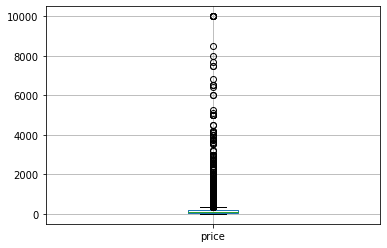

In [ ]:
# checking for any outliers in price.
df.boxplot(column=['price'])
plt.show()

In [ ]:
# removing price value as 0 as practically its not possible. So droping rows with price as zero.
price_without_zero = df[(df['price'] > 0)]
price_without_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48884 non-null  int64 
 1   name                            48884 non-null  object
 2   host_id                         48884 non-null  int64 
 3   host_name                       48884 non-null  object
 4   neighbourhood_group             48884 non-null  object
 5   neighbourhood                   48884 non-null  object
 6   room_type                       48884 non-null  object
 7   price                           48884 non-null  int64 
 8   minimum_nights                  48884 non-null  int64 
 9   number_of_reviews               48884 non-null  int64 
 10  calculated_host_listings_count  48884 non-null  int64 
 11  availability_365                48884 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [ ]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
price_without_outlier=remove_outlier(price_without_zero ,'price')

In [ ]:
result = price_without_outlier.groupby('room_type').agg({'price': ['mean', 'min', 'max']})  
result

price         
                       mean min  max
room_type                           
Entire home/apt  162.503731  10  333
Private room      79.043658  10  333
Shared room       59.397887  10  320

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

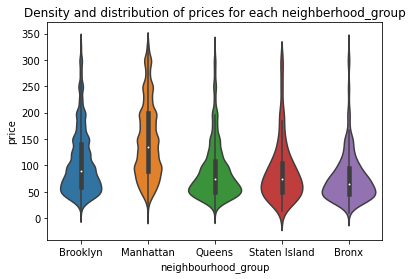

In [ ]:
fig2=sns.violinplot(x='neighbourhood_group',y=price_without_outlier['price'],data=df)
fig2.set_title('Density and distribution of prices for each neighberhood_group')

# observation3

Entire Home apartment property are more in Airbnb NYC

In [ ]:
#now lets find the types of rooms from these places
df.value_counts('room_type')

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

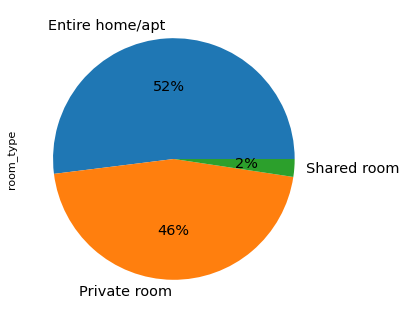

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

This shows the percentage distribution of types of rooms

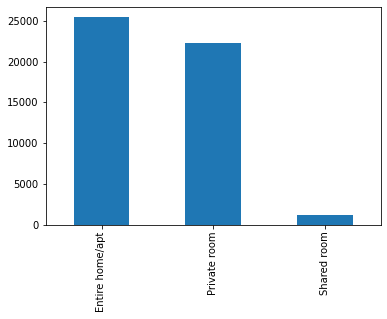

In [ ]:
pd.value_counts(df['room_type']).plot(kind="bar")

In [ ]:
df.groupby('neighbourhood_group').availability_365.value_counts()

neighbourhood_group  availability_365
Bronx                0                   177
                     365                  54
                     364                  22
                     89                   20
                     363                  17
                                        ... 
Staten Island        346                   1
                     347                   1
                     348                   1
                     357                   1
                     361                   1
Name: availability_365, Length: 1577, dtype: int64

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


# Observation4

Now we try to find the realation between different hosts and area

In [ ]:
areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


In [ ]:
top_host=df.host_name.value_counts().head(10)
top_host

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [ ]:
top_host=pd.DataFrame(top_host)
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'host_name','host_name':'count'},inplace=True)
top_host

,host_name,count
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


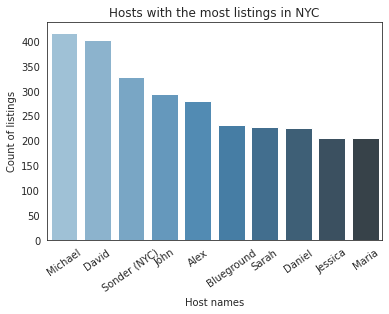

In [ ]:
fig=sns.barplot(x='host_name',y="count",data=top_host,palette='Blues_d')
fig.set_title('Hosts with the most listings in NYC')
fig.set_ylabel('Count of listings')
fig.set_xlabel('Host names')
fig.set_xticklabels(fig.get_xticklabels(), rotation=35)
sns.set_style('white')

# observation4

Q2=What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


In [ ]:
#now we will create the relation between location and reviews
area_review=df.groupby(['neighbourhood_group']).number_of_reviews.max().reset_index()  #reset_index gives another column

In [ ]:
area_review

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


Text(0.5, 1.0, 'Area vs no. of review')

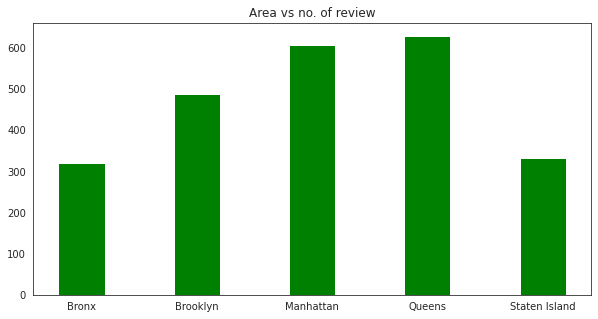

In [ ]:
#wee will draw visualize on bar plot
area = area_review['neighbourhood_group']
review = area_review['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review,color ='green',width = 0.4)

plt.title('Area vs no. of review')
 

From above graph we can know abot the reviews of all areas

In [ ]:
#now we will create relation between area and mean prices
area_price=df.groupby(['neighbourhood_group']).price.mean().reset_index()

In [ ]:
area_price

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


<BarContainer object of 5 artists>

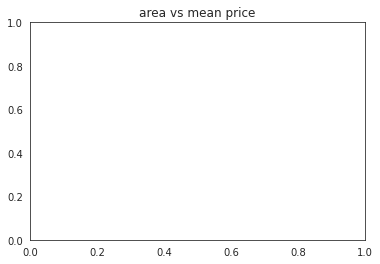

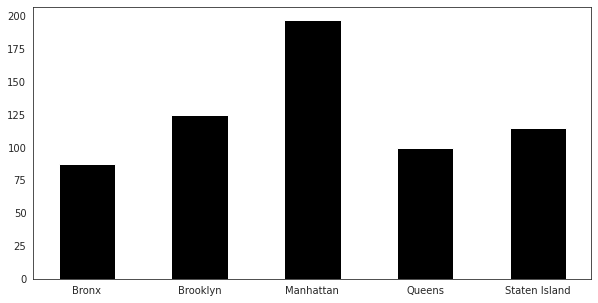

In [ ]:
#now we will visualize on bar plot
area = area_price['neighbourhood_group']
price=area_price['price']
plt.title('area vs mean price')
fig = plt.figure(figsize = (10, 5))
plt.xlabel='area'
plt.ylabel='mean price'
# create the bar plot
plt.bar(area,price ,color='black', width=0.5)

In [ ]:
#This bar graph giving us raltion between area and mean price. 
#We can see that maximum price is in 'Manhattan'and least price is in 'Bronx'

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


In [ ]:
#now we will get realtion between price and no. of reviews
price_review =df.groupby(['price']).number_of_reviews.max().reset_index()
price_review.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


In [ ]:
#draw this on graph
review=price_review['number_of_reviews']
price=price_review['price']

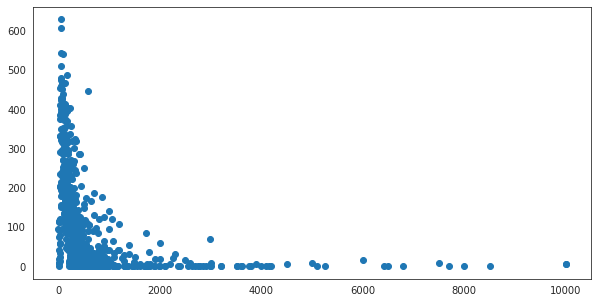

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(price,review)
plt.xlabel='price'
plt.ylabel='review'
plt.title='Price vs number of reviews'

This graph show that people prefers where price is less

*now we will get relation between area,room type and stay*

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


In [ ]:
room_type_stay=df.groupby(['neighbourhood_group','room_type'])['calculated_host_listings_count','price'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
room_type_stay

calculated_host_listings_count  price
neighbourhood_group room_type                                             
Bronx               Entire home/apt                              13   1000
                    Private room                                 37   2500
                    Shared room                                  13    800
Brooklyn            Entire home/apt                             232  10000
                    Private room                                103   7500
                    Shared room                                  34    725
Manhattan           Entire home/apt                             327  10000
                    Private room                                327   9999
                    Shared room                                  28   1000
Queens              Entire home/apt                              15   2600
                    Private room                                103  10000
                    Shared room                                  18   1800
Staten Island       Entire home/apt                               7   5000
                    Private room                                  8    300
                    Shared room                                   7    150

From above analysis we see the place and differet type of room booked and count of host.
In bronx private rooms prefered and in brooklyn Entire home/apt prefered and so on we can seen from above table.

Q3=Which hosts are the busiest and why?





# Observation5

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


In [ ]:
busy_host=df.groupby(['host_name','host_id','room_type']).number_of_reviews.max().reset_index()

In [ ]:
busy_host=busy_host.sort_values(by='number_of_reviews', ascending=False).head(10)

In [ ]:
busy_host

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37766,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


<BarContainer object of 10 artists>

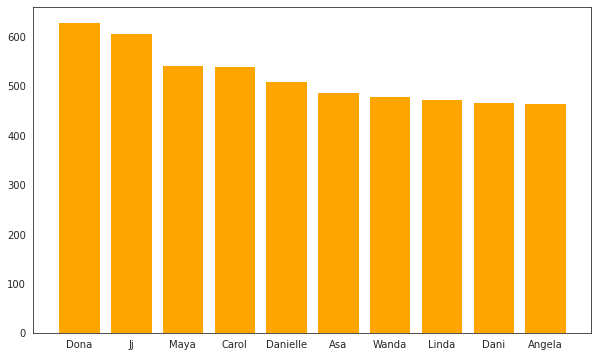

In [ ]:
name = busy_host['host_name']
reviews = busy_host['number_of_reviews']

fig=plt.figure(figsize=(10,6))

plt.bar(name,reviews, color='orange')



From above analysis we find top host like Dona, ji, Maya,Caro,Danielle and so on and top 5 booked private rooms

# Observation6

Q4=Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
traffic_areas =df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas=traffic_areas.sort_values(by="minimum_nights", ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


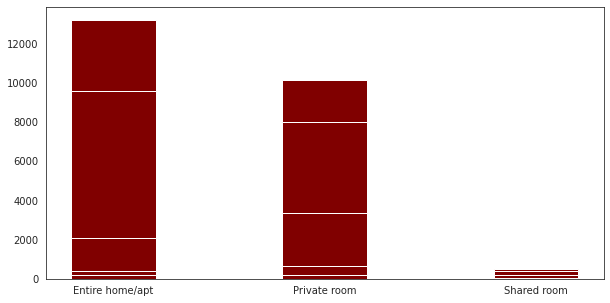

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 

plt.bar(room_type, stayed, color ='maroon',width = 0.4)
 
plt.show()

From above analysis we say that entire home/apt are highly prefered and shared rooms are preferd very less. And  private rooms are prefered in good amount.

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


# Observation7

Q5=Find the most epensive and least expensive room in every area each?

In [ ]:
df.groupby(['neighbourhood_group','room_type']).price.max().reset_index()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,1000
1,Bronx,Private room,2500
2,Bronx,Shared room,800
3,Brooklyn,Entire home/apt,10000
4,Brooklyn,Private room,7500
5,Brooklyn,Shared room,725
6,Manhattan,Entire home/apt,10000
7,Manhattan,Private room,9999
8,Manhattan,Shared room,1000
9,Queens,Entire home/apt,2600


From above analysis we have most expensive room types from each region

In [ ]:
df.groupby(['neighbourhood_group','room_type']).price.min().reset_index()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,28
1,Bronx,Private room,0
2,Bronx,Shared room,20
3,Brooklyn,Entire home/apt,0
4,Brooklyn,Private room,0
5,Brooklyn,Shared room,0
6,Manhattan,Entire home/apt,0
7,Manhattan,Private room,10
8,Manhattan,Shared room,10
9,Queens,Entire home/apt,10


From above analysis we have least expensive room types from each region

In [ ]:
df.to_csv('evans_airbnb.csv') #here we have create new file 'evans_airbnb.csv'

In [ ]:
pd.read_csv('evans_airbnb.csv').head(2)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


# Observation 8

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

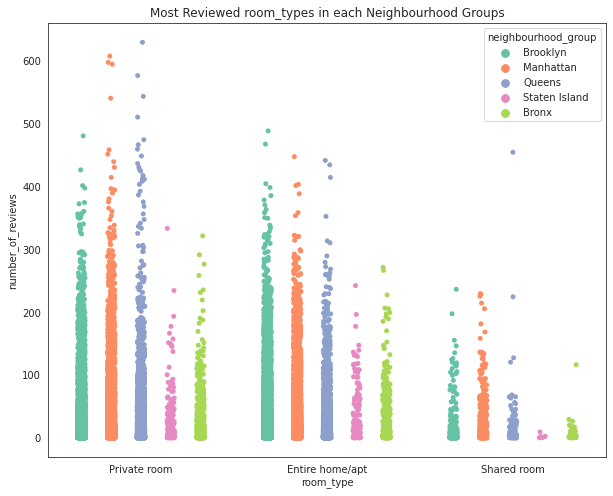

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='number_of_reviews',hue='neighbourhood_group',dodge=True,data=df,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Manhattan in the chase.

Manhattan & Queens got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

Conclusion:
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers.

Thanks